In [40]:
# Vizuelna podešavanja okruženja (samo razvuče notebook na širinu ekrana)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [41]:
import networkx as nx

input_path = "models/model_all_years.gml"
G = nx.read_gml(input_path)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 581
Number of edges: 5330
Average degree:  18.3477


In [42]:
import pandas as pd
dataPath = "data/atp_matches_2018.csv"
matches2018 = pd.read_csv(dataPath)

dataPath = "data/atp_matches_2019.csv"
matches2019 = pd.read_csv(dataPath)

dataPath = "data/atp_matches_2020.csv"
matches2020 = pd.read_csv(dataPath)


3. pitanje

In [43]:
players = G.nodes()
for player in players:
    mask_davis_cup = ((matches2018['winner_id'] == int(player)) | (matches2018['loser_id'] == int(player))) & (matches2018['tourney_id'].str.startswith("2018-M-DC"))
    mask = ((matches2018['winner_id'] == int(player)) | (matches2018['loser_id'] == int(player))) & (~matches2018['tourney_id'].str.startswith("2018-M-DC"))
    
    tourneys = matches2018[mask]
    num2018 = tourneys[['tourney_id']].nunique()['tourney_id']
   
    if mask_davis_cup.any():
        num2018 += 1
    G.nodes()[player]['tourneys_number2018'] = int(num2018)
    
    mask_davis_cup = ((matches2019['winner_id'] == int(player)) | (matches2019['loser_id'] == int(player))) & (matches2019['tourney_id'].str.startswith("2019-M-DC"))
    mask = ((matches2019['winner_id'] == int(player)) | (matches2019['loser_id'] == int(player))) & (~matches2019['tourney_id'].str.startswith("2019-M-DC"))
    
    tourneys = matches2019[mask]
    num2019 = tourneys[['tourney_id']].nunique()['tourney_id']
    if mask_davis_cup.any():
        num2019 += 1
    G.nodes()[player]['tourneys_number2019'] = int(num2019)
    
    mask_davis_cup = ((matches2020['winner_id'] == int(player)) | (matches2020['loser_id'] == int(player))) & (matches2020['tourney_id'].str.startswith("2020-M-DC"))
    mask = ((matches2020['winner_id'] == int(player)) | (matches2020['loser_id'] == int(player))) & (~matches2020['tourney_id'].str.startswith("2020-M-DC"))
    
    tourneys = matches2020[mask]
    num2020 = tourneys[['tourney_id']].nunique()['tourney_id']
    if mask_davis_cup.any():
        num2020 += 1
    G.nodes()[player]['tourneys_number2020'] = int(num2020)
    
    G.nodes()[player]['tourneys_number'] = int(num2018 + num2019 + num2020)
    
    

In [44]:
output_path = "models/model_all_years_tasks.gml"
nx.write_gml(G, output_path)

4. pitanje

In [45]:
G1 = nx.Graph()

ego0 = nx.ego_graph(G, '104926')
ego3 = nx.ego_graph(G, '111575')
ego16 = nx.ego_graph(G, '106421')

ego9 = nx.ego_graph(G, '100644')

ego12 = nx.ego_graph(G, '126774')

ego8 = nx.ego_graph(G, '104792')

set_players = set(list(ego0)).union(set(list(ego3)).union(set(list(ego16)).union(set(list(ego9)).union(set(list(ego12)).union(set(list(ego8)))))))
print(len(set_players))

199


9. pitanje

In [46]:
from networkx.algorithms import community

communities = community.girvan_newman(G)


10. pitanje

In [47]:
r_country = nx.attribute_assortativity_coefficient(G, "country")
r_weight = nx.degree_assortativity_coefficient(G, weight='weight')
r_rank = nx.attribute_assortativity_coefficient(G, "rank")

input_path = "models/model_all_years.gml"
G1 = nx.read_gml(input_path)
for node in list(G1.nodes):
    if G1.nodes()[node]['rank'] == 0:
        G1.remove_node(node)
r_rank1 = nx.attribute_assortativity_coefficient(G1, "rank")

print(f"Koeficijent asortativnosti na osnovu zemlje porekla čvora: {r_country}")
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r_weight}")
print(f"Koeficijent asortativnosti na osnovu rejtinga čvora: {r_rank}")
print(f"Koeficijent asortativnosti na osnovu rejtinga čvora, kada se ne racunaju igraci sa nepoznatim rankom: {r_rank1}")

player_id, clustering_coef = zip(*nx.clustering(G, weight = None).items())

not_zero = [(id_p, cc)  for id_p, cc in zip(player_id, clustering_coef) if cc > 0]

df = pd.DataFrame(not_zero, columns = ["id", "cc"])
df.sort_values('cc', ascending = False, inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G, weight = False, count_zeros = False)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
prosecna_duzina_puta = nx.algorithms.shortest_paths.generic.average_shortest_path_length(G0)

print(f"Prosecna duzina puta: {prosecna_duzina_puta}")
print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
for row in df.itertuples():
    if G.nodes[row[1]]['tourneys_number'] >= 20:
        print('{0:10s} {1:15s} {2:15s} ({3}) => {4:5f}'.format(row[1], G.nodes[row[1]]['first_name'], G.nodes[row[1]]['last_name'], G.nodes[row[1]]['rank'], row[2]))
    
    

Koeficijent asortativnosti na osnovu zemlje porekla čvora: 0.009843043206048575
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.14652712553286887
Koeficijent asortativnosti na osnovu rejtinga čvora: -0.003844501509719885
Koeficijent asortativnosti na osnovu rejtinga čvora, kada se ne racunaju igraci sa nepoznatim rankom: -0.005800054385565243
Prosecna duzina puta: 3.23386302910983
Max lokalni cc: 1.0
Prosečan cc: 0.3521726777871856
Lokalni stepeni klasterisanja koji nisu nula:
104607     Tomas           Berdych         (0) => 0.520732
105223     Juan Martin     Del Potro       (157) => 0.502262
105577     Vasek           Pospisil        (61) => 0.499419
103819     Roger           Federer         (5) => 0.486857
105819     Guido           Andreozzi       (163) => 0.449231
105777     Grigor          Dimitrov        (19) => 0.447982
104731     Kevin           Anderson        (81) => 0.443452
200615     Alexei          Popyrin         (113) => 0.434921
103970     David     

11.pitanje


In [48]:
dict_w = dict(G.degree(weight="weight"))
dict_not_w = dict(G.degree())
dict_players = dict()
for key, value in dict_w.items():
    
    weight_degree = value
    degree = dict_not_w[key]
    
    dict_players[key] = (degree, weight_degree, weight_degree/degree)
    
sorted_dict = dict(sorted(dict_players.items(), key=lambda kv: kv[1][2], reverse = True))

for key, value in sorted_dict.items():
    print('{0:8s} {1:15s} {2:15s} ({3:4d}) => {4}'.format(key, G.nodes[key]['first_name'], G.nodes[key]['last_name'], G.nodes[key]['rank'], value))

104925   Novak           Djokovic        (   1) => (80, 180, 2.25)
126774   Stefanos        Tsitsipas       (   6) => (99, 196, 1.97979797979798)
100644   Alexander       Zverev          (   7) => (95, 183, 1.9263157894736842)
106233   Dominic         Thiem           (   3) => (92, 176, 1.9130434782608696)
106421   Daniil          Medvedev        (   4) => (97, 183, 1.8865979381443299)
104745   Rafael          Nadal           (   2) => (82, 151, 1.8414634146341464)
106043   Diego Sebastian Schwartzman     (   9) => (90, 165, 1.8333333333333333)
133430   Denis           Shapovalov      (  12) => (92, 161, 1.75)
105676   David           Goffin          (  15) => (75, 131, 1.7466666666666666)
103819   Roger           Federer         (   5) => (74, 129, 1.7432432432432432)
126094   Andrey          Rublev          (   8) => (90, 151, 1.6777777777777778)
104545   John            Isner           (  25) => (74, 122, 1.6486486486486487)
106432   Borna           Coric           (  24) => (84, 13

17. pitanje

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter

def plot_deg_frequency(G, weighted=False, xscale = "log", yscale = "log", title = ""):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

      
    plt.subplots(figsize=(10, 8))
    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')   
        
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
    
    plt.title(title)
    
    plt.scatter(x, y, marker='.')  
    
    path = "C:\\Users\\Aleksandar\\Desktop\\ASM_rezultati\\17\\distribucija_po_tezinskom_stepenu" + title + ".png" if weighted else "C:\\Users\\Aleksandar\\Desktop\\ASM_rezultati\\17\\distribucija_po_netezinskom_stepenu" + title + ".png"
    plt.savefig(path)
    plt.show()

Counter({1: 159, 2: 70, 3: 43, 5: 25, 6: 25, 4: 22, 7: 14, 9: 10, 8: 10, 13: 7, 10: 7, 22: 6, 80: 6, 20: 6, 23: 6, 35: 5, 71: 5, 52: 5, 48: 5, 29: 5, 18: 4, 74: 4, 41: 4, 17: 4, 14: 4, 66: 4, 16: 4, 19: 4, 30: 3, 27: 3, 64: 3, 11: 3, 15: 3, 67: 3, 12: 3, 86: 3, 90: 3, 83: 3, 84: 3, 65: 3, 75: 3, 21: 2, 82: 2, 79: 2, 92: 2, 46: 2, 55: 2, 28: 2, 54: 2, 25: 2, 93: 2, 60: 2, 89: 2, 42: 2, 49: 2, 61: 2, 81: 2, 78: 2, 56: 2, 57: 2, 36: 2, 63: 2, 38: 2, 32: 2, 91: 1, 95: 1, 94: 1, 70: 1, 96: 1, 40: 1, 85: 1, 103: 1, 44: 1, 88: 1, 77: 1, 26: 1, 45: 1, 62: 1, 34: 1, 53: 1, 37: 1, 47: 1, 50: 1, 99: 1, 73: 1, 97: 1, 68: 1})


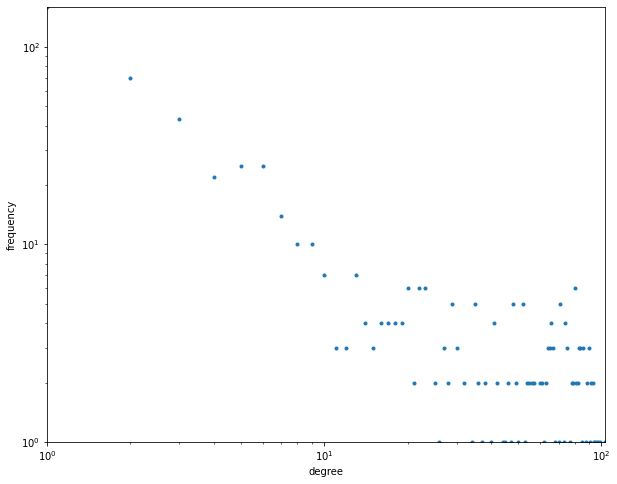

In [50]:
plot_deg_frequency(G)

Counter({1: 159, 2: 70, 3: 41, 6: 26, 4: 24, 5: 23, 7: 12, 10: 11, 8: 10, 9: 9, 23: 7, 21: 6, 13: 5, 24: 5, 14: 5, 18: 4, 31: 4, 16: 4, 38: 4, 126: 4, 17: 4, 50: 4, 36: 3, 29: 3, 114: 3, 131: 3, 11: 3, 89: 3, 61: 3, 74: 3, 20: 3, 19: 3, 73: 3, 55: 3, 40: 2, 66: 2, 25: 2, 102: 2, 62: 2, 183: 2, 151: 2, 49: 2, 83: 2, 118: 2, 15: 2, 60: 2, 32: 2, 84: 2, 104: 2, 39: 2, 87: 2, 88: 2, 12: 2, 101: 2, 41: 2, 71: 2, 135: 1, 110: 1, 122: 1, 45: 1, 161: 1, 52: 1, 109: 1, 91: 1, 180: 1, 139: 1, 96: 1, 107: 1, 22: 1, 26: 1, 146: 1, 140: 1, 44: 1, 134: 1, 120: 1, 56: 1, 141: 1, 94: 1, 98: 1, 58: 1, 112: 1, 158: 1, 100: 1, 95: 1, 142: 1, 72: 1, 93: 1, 68: 1, 80: 1, 119: 1, 111: 1, 115: 1, 136: 1, 47: 1, 129: 1, 124: 1, 108: 1, 42: 1, 65: 1, 33: 1, 165: 1, 59: 1, 106: 1, 128: 1, 30: 1, 46: 1, 121: 1, 28: 1, 63: 1, 176: 1, 196: 1, 127: 1, 116: 1, 85: 1, 43: 1, 138: 1})


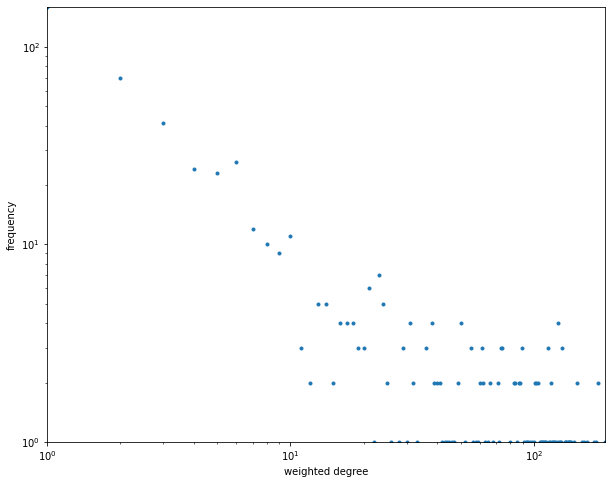

In [51]:
plot_deg_frequency(G, weighted = True)

20. pitanje

Counter({40: 7, 41: 5, 37: 4, 33: 4, 43: 4, 51: 4, 28: 4, 39: 3, 34: 3, 30: 2, 36: 2, 26: 2, 5: 2, 42: 2, 8: 2, 48: 2, 11: 2, 31: 2, 23: 2, 27: 2, 14: 2, 50: 2, 52: 1, 17: 1, 45: 1, 7: 1, 3: 1, 2: 1, 9: 1, 15: 1, 80: 1, 18: 1, 44: 1, 29: 1, 4: 1, 46: 1, 16: 1, 20: 1, 47: 1})


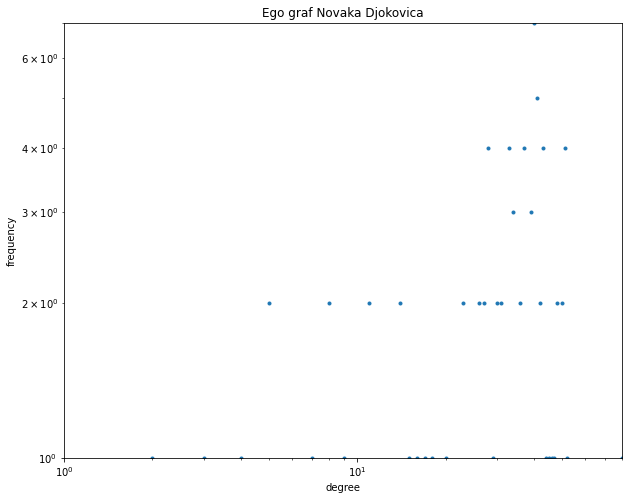

Counter({29: 5, 24: 5, 38: 4, 51: 4, 47: 4, 30: 3, 42: 3, 43: 3, 48: 3, 28: 3, 46: 3, 45: 3, 8: 3, 3: 2, 33: 2, 40: 2, 26: 2, 39: 2, 20: 2, 12: 2, 21: 1, 36: 1, 4: 1, 34: 1, 55: 1, 52: 1, 14: 1, 35: 1, 49: 1, 15: 1, 37: 1, 82: 1, 41: 1, 2: 1, 17: 1, 23: 1, 16: 1, 60: 1, 54: 1, 53: 1, 32: 1, 25: 1, 44: 1})


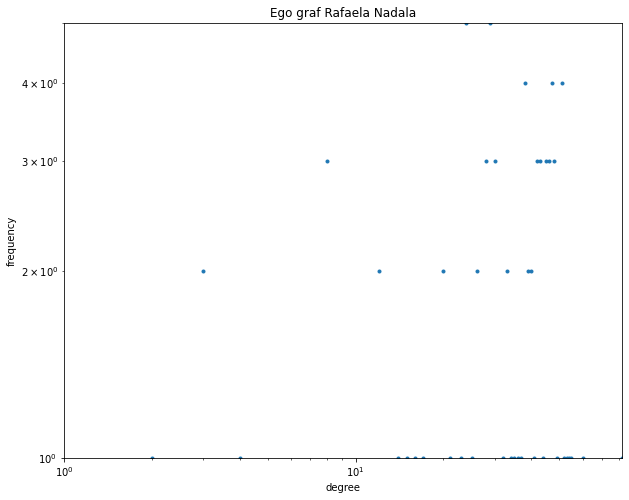

Counter({41: 7, 46: 5, 42: 5, 48: 4, 39: 4, 47: 4, 35: 4, 32: 3, 45: 3, 27: 3, 37: 3, 28: 2, 38: 2, 51: 2, 36: 2, 50: 2, 14: 1, 74: 1, 33: 1, 20: 1, 31: 1, 4: 1, 29: 1, 26: 1, 21: 1, 43: 1, 44: 1, 30: 1, 52: 1, 11: 1, 8: 1, 40: 1, 34: 1, 6: 1, 3: 1, 23: 1})


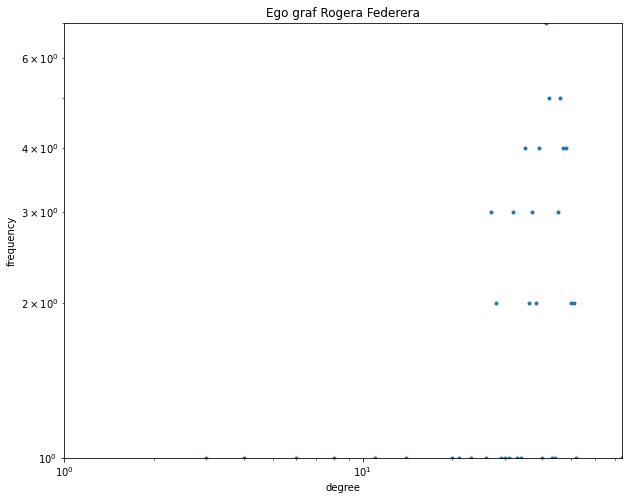

In [52]:
G_novak = nx.ego_graph(G, '104925')

G_nadal = nx.ego_graph(G, '104745')

G_federer = nx.ego_graph(G, '103819')


plot_deg_frequency(G_novak, title = "Ego graf Novaka Djokovica")
plot_deg_frequency(G_nadal, title = "Ego graf Rafaela Nadala")
plot_deg_frequency(G_federer, title = "Ego graf Rogera Federera")


22.pitanje

a) Novak mega cvor

In [59]:
G_mega_novak = nx.Graph()
G_mega_novak.add_node('1', first_name = "Mega", last_name = "Node")

novak_nodes_list = list(G_novak.nodes)

for node in list(G.nodes(data=True)):
    if node[0] not in novak_nodes_list:
        G_mega_novak.add_node(node[0], first_name = node[1]["first_name"], last_name = node[1]["last_name"])

for edge in list(G.edges(data=True)):
    if edge[0] in novak_nodes_list and edge[1] in novak_nodes_list:
        continue
    if edge[0] in novak_nodes_list:
        if ('1', edge[1]) in G_mega_novak.edges():
            G_mega_novak['1'][edge[1]]['weight'] += edge[2]["weight"]
        else:
            G_mega_novak.add_edge('1', edge[1], weight = edge[2]["weight"])
    elif edge[1] in novak_nodes_list:
        if ('1', edge[0]) in G_mega_novak.edges():
            G_mega_novak['1'][edge[0]]['weight'] += edge[2]["weight"]
        else:
            G_mega_novak.add_edge('1', edge[0], weight = edge[2]["weight"])
    elif (edge[0], edge[1]) in G_mega_novak.edges():
        G_mega_novak[edge[0]][edge[1]]['weight'] += edge[2]["weight"]
    else:
        G_mega_novak.add_edge(edge[0], edge[1], weight = edge[2]["weight"])

output_path = "models/novak_mega_node.gml"
nx.write_gml(G_mega_novak, output_path)

Name: 
Type: Graph
Number of nodes: 581
Number of edges: 5330
Average degree:  18.3477
Name: 
Type: Graph
Number of nodes: 501
Number of edges: 1793
Average degree:   7.1577


b) Nadal mega cvor

In [61]:
G_mega_nadal = nx.Graph()
G_mega_nadal.add_node('1', first_name = "Mega", last_name = "Node")

nadal_nodes_list = list(G_nadal.nodes)

for node in list(G.nodes(data=True)):
    if node[0] not in nadal_nodes_list:
        G_mega_nadal.add_node(node[0], first_name = node[1]["first_name"], last_name = node[1]["last_name"])

for edge in list(G.edges(data=True)):
    if edge[0] in nadal_nodes_list and edge[1] in nadal_nodes_list:
        continue
    if edge[0] in nadal_nodes_list:
        if ('1', edge[1]) in G_mega_nadal.edges():
            G_mega_nadal['1'][edge[1]]['weight'] += edge[2]["weight"]
        else:
            G_mega_nadal.add_edge('1', edge[1], weight = edge[2]["weight"])
    elif edge[1] in nadal_nodes_list:
        if ('1', edge[0]) in G_mega_nadal.edges():
            G_mega_nadal['1'][edge[0]]['weight'] += edge[2]["weight"]
        else:
            G_mega_nadal.add_edge('1', edge[0], weight = edge[2]["weight"])
    elif (edge[0], edge[1]) in G_mega_nadal.edges():
        G_mega_nadal[edge[0]][edge[1]]['weight'] += edge[2]["weight"]
    else:
        G_mega_nadal.add_edge(edge[0], edge[1], weight = edge[2]["weight"])

output_path = "models/nadal_mega_node.gml"
nx.write_gml(G_mega_nadal, output_path)
print(nx.info(G_mega_nadal))

Name: 
Type: Graph
Number of nodes: 499
Number of edges: 1743
Average degree:   6.9860


c) Federer mega cvor

In [62]:
G_mega_federer = nx.Graph()
G_mega_federer.add_node('1', first_name = "Mega", last_name = "Node")

federer_nodes_list = list(G_federer.nodes)

for node in list(G.nodes(data=True)):
    if node[0] not in federer_nodes_list:
        G_mega_federer.add_node(node[0], first_name = node[1]["first_name"], last_name = node[1]["last_name"])

for edge in list(G.edges(data=True)):
    if edge[0] in federer_nodes_list and edge[1] in federer_nodes_list:
        continue
    if edge[0] in federer_nodes_list:
        if ('1', edge[1]) in G_mega_federer.edges():
            G_mega_federer['1'][edge[1]]['weight'] += edge[2]["weight"]
        else:
            G_mega_federer.add_edge('1', edge[1], weight = edge[2]["weight"])
    elif edge[1] in federer_nodes_list:
        if ('1', edge[0]) in G_mega_federer.edges():
            G_mega_federer['1'][edge[0]]['weight'] += edge[2]["weight"]
        else:
            G_mega_federer.add_edge('1', edge[0], weight = edge[2]["weight"])
    elif (edge[0], edge[1]) in G_mega_federer.edges():
        G_mega_federer[edge[0]][edge[1]]['weight'] += edge[2]["weight"]
    else:
        G_mega_federer.add_edge(edge[0], edge[1], weight = edge[2]["weight"])

output_path = "models/federer_mega_node.gml"
nx.write_gml(G_mega_federer, output_path)
print(nx.info(G_mega_federer))

Name: 
Type: Graph
Number of nodes: 507
Number of edges: 1800
Average degree:   7.1006


23. pitanje

Name: 
Type: Graph
Number of nodes: 136
Number of edges: 2563
Average degree:  37.6912
Koeficijent asortativnosti na osnovu netezinskog stepena čvora: 0.16919387110544537
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.14652712553286887
Procenat igraca koji pripadaju ovom grafu je 23.407917383820998 %
Counter({41: 7, 46: 5, 42: 5, 48: 4, 39: 4, 47: 4, 35: 4, 32: 3, 45: 3, 27: 3, 37: 3, 28: 2, 38: 2, 51: 2, 36: 2, 50: 2, 14: 1, 74: 1, 33: 1, 20: 1, 31: 1, 4: 1, 29: 1, 26: 1, 21: 1, 43: 1, 44: 1, 30: 1, 52: 1, 11: 1, 8: 1, 40: 1, 34: 1, 6: 1, 3: 1, 23: 1})


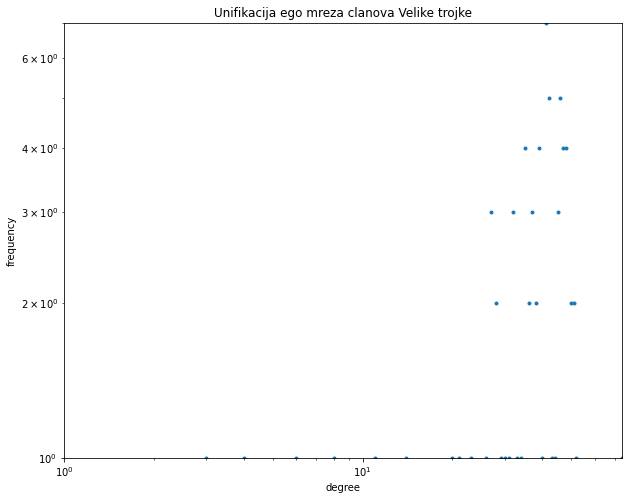

[['100644',
  '103607',
  '103819',
  '103852',
  '103970',
  '104198',
  '104259',
  '104269',
  '104291',
  '104297',
  '104312',
  '104424',
  '104468',
  '104527',
  '104534',
  '104542',
  '104545',
  '104547',
  '104607',
  '104620',
  '104655',
  '104665',
  '104731',
  '104745',
  '104755',
  '104792',
  '104797',
  '104871',
  '104898',
  '104919',
  '104925',
  '104926',
  '104999',
  '105023',
  '105041',
  '105051',
  '105062',
  '105074',
  '105077',
  '105138',
  '105166',
  '105173',
  '105216',
  '105223',
  '105227',
  '105238',
  '105311',
  '105332',
  '105357',
  '105373',
  '105376',
  '105379',
  '105385',
  '105430',
  '105449',
  '105453',
  '105526',
  '105550',
  '105554',
  '105575',
  '105577',
  '105583',
  '105643',
  '105657',
  '105676',
  '105683',
  '105732',
  '105777',
  '105806',
  '105807',
  '105815',
  '105870',
  '105882',
  '105902',
  '105916',
  '105932',
  '105936',
  '105967',
  '106000',
  '106043',
  '106045',
  '106065',
  '106071',
  '1

In [73]:
from networkx.algorithms import community

G_unija = nx.Graph()
G_unija.add_nodes_from(G_novak.nodes(data=True))
G_unija.add_nodes_from(G_nadal.nodes(data=True))
G_unija.add_nodes_from(G_federer.nodes(data=True))


for e in G_novak.edges():
    if e not in G_unija.edges():
        G_unija.add_edge(e[0], e[1], weight = (G_novak.get_edge_data(*e))['weight'])

for e in G_nadal.edges():
    if e not in G_unija.edges():
        G_unija.add_edge(e[0], e[1], weight = (G_nadal.get_edge_data(*e))['weight'])

for e in G_federer.edges():
    if e not in G_unija.edges():
        G_unija.add_edge(e[0], e[1], weight = (G_federer.get_edge_data(*e))['weight'])

output_path = "models/ego_mreze.gml"
nx.write_gml(G_unija, output_path)

print(nx.info(G_unija))

r = nx.degree_assortativity_coefficient(G)
r_weight = nx.degree_assortativity_coefficient(G, weight='weight')

print(f"Koeficijent asortativnosti na osnovu netezinskog stepena čvora: {r}")
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r_weight}")

print(f"Procenat igraca koji pripadaju ovom grafu je {G_unija.number_of_nodes() * 100 / G.number_of_nodes()} %")

plot_deg_frequency(G_federer, title = "Unifikacija ego mreza clanova Velike trojke")


communities_generator = community.girvan_newman(G_unija)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

24. pitanje

Counter({1: 159, 2: 70, 3: 41, 6: 26, 4: 24, 5: 23, 7: 12, 10: 11, 8: 10, 9: 9, 23: 7, 21: 6, 13: 5, 24: 5, 14: 5, 18: 4, 31: 4, 16: 4, 38: 4, 126: 4, 17: 4, 50: 4, 36: 3, 29: 3, 114: 3, 131: 3, 11: 3, 89: 3, 61: 3, 74: 3, 20: 3, 19: 3, 73: 3, 55: 3, 40: 2, 66: 2, 25: 2, 102: 2, 62: 2, 183: 2, 151: 2, 49: 2, 83: 2, 118: 2, 15: 2, 60: 2, 32: 2, 84: 2, 104: 2, 39: 2, 87: 2, 88: 2, 12: 2, 101: 2, 41: 2, 71: 2, 135: 1, 110: 1, 122: 1, 45: 1, 161: 1, 52: 1, 109: 1, 91: 1, 180: 1, 139: 1, 96: 1, 107: 1, 22: 1, 26: 1, 146: 1, 140: 1, 44: 1, 134: 1, 120: 1, 56: 1, 141: 1, 94: 1, 98: 1, 58: 1, 112: 1, 158: 1, 100: 1, 95: 1, 142: 1, 72: 1, 93: 1, 68: 1, 80: 1, 119: 1, 111: 1, 115: 1, 136: 1, 47: 1, 129: 1, 124: 1, 108: 1, 42: 1, 65: 1, 33: 1, 165: 1, 59: 1, 106: 1, 128: 1, 30: 1, 46: 1, 121: 1, 28: 1, 63: 1, 176: 1, 196: 1, 127: 1, 116: 1, 85: 1, 43: 1, 138: 1})


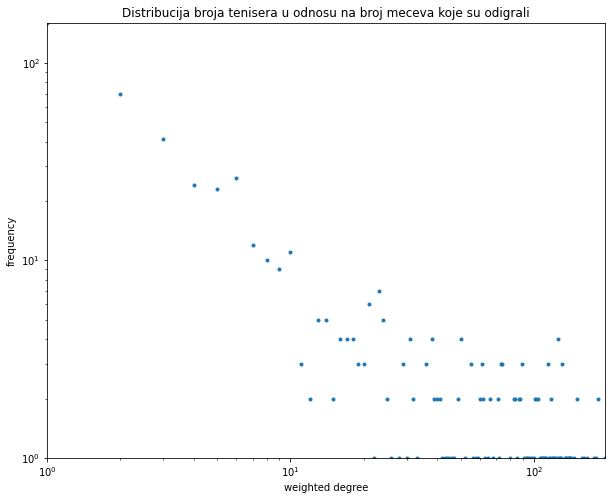

In [68]:
plot_deg_frequency(G, weighted = True, title = "Distribucija broja tenisera u odnosu na broj meceva koje su odigrali")

25. pitanje

a)

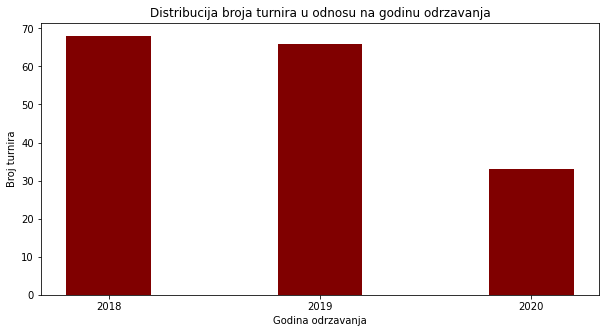

In [69]:
dict_godina = dict()

dataPath = "data/atp_matches_2018.csv"
matches2018 = pd.read_csv(dataPath)

num2018 = matches2018.loc[~matches2018['tourney_id'].str.startswith("2018-M-DC"),'tourney_id'].agg(['nunique'])[0]

dataPath = "data/atp_matches_2019.csv"
matches2019 = pd.read_csv(dataPath)

num2019 = matches2019.loc[~matches2019['tourney_id'].str.startswith("2019-M-DC"),'tourney_id'].agg(['nunique'])[0]

dataPath = "data/atp_matches_2020.csv"
matches2020 = pd.read_csv(dataPath)

num2020 = matches2020.loc[~matches2020['tourney_id'].str.startswith("2020-M-DC"),'tourney_id'].agg(['nunique'])[0]

dict_godina["2018"] = num2018
dict_godina["2019"] = num2019
dict_godina["2020"] = num2020

godine = list(dict_godina.keys())
broj_turnira = list(dict_godina.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(godine, broj_turnira, color ='maroon',
        width = 0.4)
 
plt.xlabel("Godina odrzavanja")
plt.ylabel("Broj turnira")
plt.title("Distribucija broja turnira u odnosu na godinu odrzavanja")
path = "C:\\Users\\Aleksandar\\Desktop\\ASM_rezultati\\25\\godina.png" 
plt.savefig(path)
plt.show()

b)

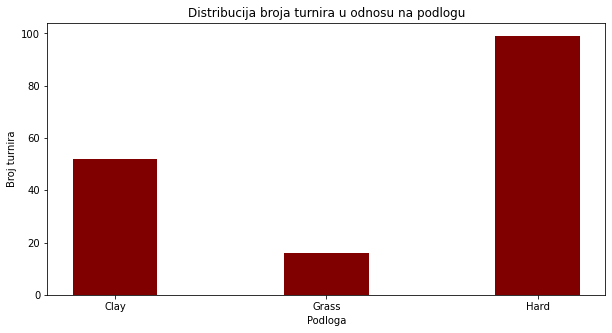

In [70]:
dict_surface = dict()

dataPath = "data/atp_matches_2018.csv"
matches2018 = pd.read_csv(dataPath)

mask2018 = ~matches2018['tourney_id'].str.startswith("2018-M-DC")
matches2018 = (matches2018[mask2018].groupby(['tourney_id','surface']).nunique().reset_index())[['tourney_id','surface']]
matches2018 = matches2018.groupby('surface').size().reset_index().rename(columns={0:'count'})

dataPath = "data/atp_matches_2019.csv"
matches2019 = pd.read_csv(dataPath)

mask2019 = ~matches2019['tourney_id'].str.startswith("2019-M-DC")
matches2019 = (matches2019[mask2019].groupby(['tourney_id','surface']).nunique().reset_index())[['tourney_id','surface']]
matches2019 = matches2019.groupby('surface').size().reset_index().rename(columns={0:'count'})

dataPath = "data/atp_matches_2020.csv"
matches2020 = pd.read_csv(dataPath)

mask2020 = ~matches2020['tourney_id'].str.startswith("2020-M-DC")
matches2020 = (matches2020[mask2020].groupby(['tourney_id','surface']).nunique().reset_index())[['tourney_id','surface']]
matches2020 = matches2020.groupby('surface').size().reset_index().rename(columns={0:'count'})

frames = [matches2018, matches2019, matches2020]

tourneys = pd.concat(frames)

for index, row in tourneys.iterrows():
    surface = row['surface']
    num = row['count']
    if surface in dict_surface:
        dict_surface[surface] += num
    else:
        dict_surface[surface] = num
        
podloge = list(dict_surface.keys())
broj_turnira = list(dict_surface.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(podloge, broj_turnira, color ='maroon',
        width = 0.4)
 
plt.xlabel("Podloga")
plt.ylabel("Broj turnira")
plt.title("Distribucija broja turnira u odnosu na podlogu")
path = "C:\\Users\\Aleksandar\\Desktop\\ASM_rezultati\\25\\podloga.png" 
plt.savefig(path)
plt.show()

26. pitanje

a)

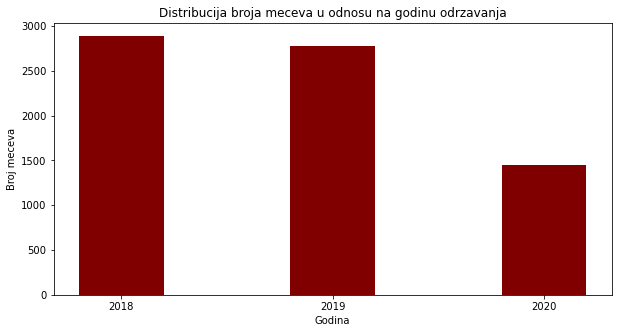

In [71]:
dict_years = dict()

dataPath = "data/atp_matches_2018.csv"
matches2018 = pd.read_csv(dataPath)

dict_years['2018'] = matches2018.shape[0]

dataPath = "data/atp_matches_2019.csv"
matches2019 = pd.read_csv(dataPath)

dict_years['2019'] = matches2019.shape[0]

dataPath = "data/atp_matches_2020.csv"
matches2020 = pd.read_csv(dataPath)

dict_years['2020'] = matches2020.shape[0]

godine = list(dict_years.keys())
broj_meceva = list(dict_years.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(godine, broj_meceva, color ='maroon',
        width = 0.4)
 
plt.xlabel("Godina")
plt.ylabel("Broj meceva")
plt.title("Distribucija broja meceva u odnosu na godinu odrzavanja")
path = "C:\\Users\\Aleksandar\\Desktop\\ASM_rezultati\\26\\godina.png" 
plt.savefig(path)
plt.show()

b)

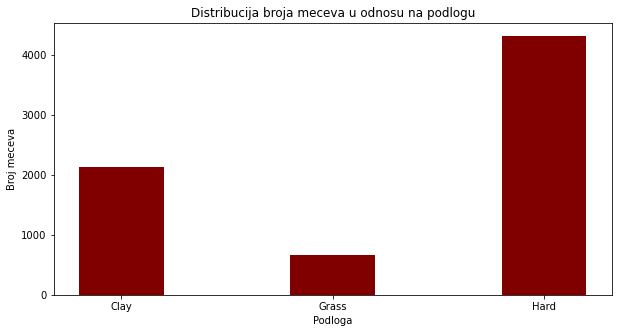

In [72]:
dict_surface = dict()

dataPath = "data/atp_matches_2018.csv"
matches2018 = pd.read_csv(dataPath)


matches2018 = matches2018.groupby(['surface']).size().reset_index().rename(columns={0:'count'})


dataPath = "data/atp_matches_2019.csv"
matches2019 = pd.read_csv(dataPath)

matches2019 = matches2019.groupby(['surface']).size().reset_index().rename(columns={0:'count'})

dataPath = "data/atp_matches_2020.csv"
matches2020 = pd.read_csv(dataPath)

matches2020 = matches2020.groupby(['surface']).size().reset_index().rename(columns={0:'count'})

frames = [matches2018, matches2019, matches2020]

tourneys = pd.concat(frames)

for index, row in tourneys.iterrows():
    surface = row['surface']
    num = row['count']
    if surface in dict_surface:
        dict_surface[surface] += num
    else:
        dict_surface[surface] = num
        
podloge = list(dict_surface.keys())
broj_meceva = list(dict_surface.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(podloge, broj_meceva, color ='maroon',
        width = 0.4)
 
plt.xlabel("Podloga")
plt.ylabel("Broj meceva")
plt.title("Distribucija broja meceva u odnosu na podlogu")
path = "C:\\Users\\Aleksandar\\Desktop\\ASM_rezultati\\26\\podloga.png" 
plt.savefig(path)
plt.show()